#                                       Students Grade Prediction
Now-a-days datascience has created great impact in the field of education. It helps in identifying students who could not perform well in their examinations due to various factors. If such students are recogonised earlier it is possible for teachers to reach them and give them best training so that the fears of the students are gone. Machine Learning helps in analysing and predicting students future grade based on the past data and their family status. Here we will be using two classification algorithm. They are Decision Tree and Random Forest. Although both are similar Random Forest gives more accurate prediction than Decision Tree. From previous statement it would be obvious to go ahead only with Random Forest, but let us also give Decision Tree a chance of prediction. Lets test both algorithms accuracy and come to a conclusion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('student-por.csv',sep=';')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

To make easier for prediction lets reduce Grade 1, Grade 2, Grade 3 marks to preformance rate.
We could grade 0 to 7 as Poor marks, 8 to 10 as Pass marks, 11 to 15 as Good marks, 16 to 20 as Excellent marks.

In [5]:
def get_grades(val):
    grades={'Poor':[0,1,2,3,4,5,6,7],
            'Pass':[8,9,10],
            'Good':[11,12,13,14,15],
            'Excellent':[16,17,18,19,20]}
    for key,value in grades.items():
        if val in value:
            return key

In [6]:
for i in range(len(y)):
    y[i]=('{}'.format(get_grades(y[i])))

In [7]:
y

0           Good
1           Good
2           Good
3           Good
4           Good
         ...    
644         Pass
645    Excellent
646         Pass
647         Pass
648         Good
Name: G3, Length: 649, dtype: object

In [8]:
for i in range(len(X)):
    X['G1'][i]=('{}'.format(get_grades(X['G1'][i])))
    X['G2'][i]=('{}'.format(get_grades(X['G2'][i])))

In [9]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,Poor,Good
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,Pass,Good
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,Good,Good
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,Good,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,Good,Good


In the above model G1,G2 in X has been changes and G3 in y has also been changed.
Now let us see the features in X which been used to determine the past grades and family status of a student

In [10]:
X.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

Let us check whether there are any missing data.

In [11]:
X.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
dtype: bool

Absolutely no missing data

In [12]:
X.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1            object
G2            object
dtype: object

Since some of the features are of object type we could encode it using Label Encoder. Features of type objects cannot be used to predict as the machine can interpret only numbers

In [13]:
f=['school','sex','address','famsize','Pstatus','Mjob','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities',
   'nursery','higher','internet','romantic','G1','G2']

In [14]:
le=LabelEncoder()
for i in f:
    X[i]=le.fit_transform(X[i])

In [15]:
le=LabelEncoder()
y=le.fit_transform(y)

In [16]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,4,3,1
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,2,2,1
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,6,1,1
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,0,1,1
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,0,1,1


Atlast we have done encoding. We can notice that there are too many features for prediction. This reduces the running time and usage of unwanted features are useless. So lets figure out which are the unwanted features.

In [17]:
chi_score=chi2(X,y)
chi_score

(array([4.24121218e+01, 4.75698726e+00, 2.91764188e+00, 4.49544561e+00,
        3.06643441e+00, 2.88490730e-02, 2.48046723e+01, 1.92037192e+01,
        1.69335683e+01, 2.43774629e+00, 2.04455601e+01, 2.93725313e+00,
        4.54397297e+00, 1.19058507e+01, 2.12328423e+02, 8.13929335e+00,
        1.77389821e+00, 2.10508739e+00, 1.20213938e+00, 1.76596120e-01,
        9.16018457e+00, 2.57386217e+00, 4.94985227e+00, 4.92589653e-01,
        4.21326552e+00, 2.64973555e+00, 1.21950031e+01, 1.19906789e+01,
        1.93127511e+00, 1.11559573e+02, 1.39979682e+02, 1.72002493e+02]),
 array([3.28027227e-09, 1.90481448e-01, 4.04498256e-01, 2.12696889e-01,
        3.81495285e-01, 9.98708004e-01, 1.69627233e-05, 2.48121555e-04,
        7.29326993e-04, 4.86646842e-01, 1.37217032e-04, 4.01401029e-01,
        2.08401376e-01, 7.71273415e-03, 9.13995605e-46, 4.32189634e-02,
        6.20631383e-01, 5.50884236e-01, 7.52491245e-01, 9.81276005e-01,
        2.72352421e-02, 4.62090283e-01, 1.75506252e-01, 9.2051

Here the second array gives the P-value of chi-square evaluation. If P-value is greater for a feature then the feature is unwanted or useless for prediction 

In [18]:
p_values=pd.Series(chi_score[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values

Pstatus       9.987080e-01
nursery       9.812760e-01
famrel        9.205164e-01
activities    7.524912e-01
famsup        6.206314e-01
health        5.867926e-01
paid          5.508842e-01
Fjob          4.866468e-01
internet      4.620903e-01
goout         4.488369e-01
age           4.044983e-01
guardian      4.014010e-01
famsize       3.814953e-01
freetime      2.393371e-01
address       2.126969e-01
traveltime    2.084014e-01
sex           1.904814e-01
romantic      1.755063e-01
schoolsup     4.321896e-02
higher        2.723524e-02
studytime     7.712734e-03
Walc          7.415159e-03
Dalc          6.744158e-03
Mjob          7.293270e-04
Fedu          2.481216e-04
reason        1.372170e-04
Medu          1.696272e-05
school        3.280272e-09
absences      5.066194e-24
G1            3.818042e-30
G2            4.702664e-37
failures      9.139956e-46
dtype: float64

We could see Parents status,nursery,famrel,activities,famsup,health,paid are some of the useless feature for prediction. So lets get rid of those features from our dataset

In [19]:
X.drop(['Pstatus','nursery','famrel','activities','famsup','health','paid'],axis=1)

,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,freetime,goout,Dalc,Walc,absences,G1,G2
0,0,0,18,1,0,4,4,0,4,0,...,1,0,0,3,4,1,1,4,3,1
1,0,0,17,1,0,1,1,0,2,0,...,1,1,0,3,3,1,1,2,2,1
2,0,0,15,1,1,1,1,0,2,2,...,1,1,0,3,2,2,3,6,1,1
3,0,0,15,1,0,4,2,1,3,1,...,1,1,1,2,2,1,1,0,1,1
4,0,0,16,1,0,3,3,2,2,1,...,1,0,0,3,2,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,2,3,3,2,0,...,1,1,0,4,2,1,2,4,2,1
645,1,0,18,1,1,3,1,4,3,0,...,1,1,0,3,4,1,1,4,1,1
646,1,0,18,1,0,1,1,2,2,0,...,1,0,0,1,1,1,1,6,1,1
647,1,1,17,1,1,3,1,3,3,0,...,1,1,0,4,5,3,4,6,2,2


We scored out unwanted features. Now lets create training and testing set for our dataset. Of the total dataset 20% goes for testing set.

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
y_train

array([1, 3, 0, 1, 1, 2, 3, 3, 1, 1, 1, 2, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0,
       0, 3, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 3, 1, 2, 2, 0, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 3, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
       3, 1, 1, 1, 2, 3, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 3, 1, 0,
       2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3,
       1, 1, 0, 2, 1, 3, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 3, 1, 2, 1, 1, 3, 1, 1, 2, 3, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 3, 2, 0,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       3, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 3, 3, 1, 1,

In [22]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
y_pred=dtc.predict(X_test)

We have trained the model and tested it using the test set. Now let's visualize how best it did using Heat map.

Text(33.0, 0.5, 'predicted label')

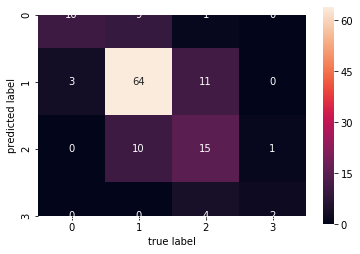

In [24]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [25]:
accuracy_score(y_test,y_pred)

0.7

Each of our features have variying number which is difficult for our predictor to reach the global minimum. Therefor we are going to normalize the features to a particular range.

In [26]:
normalizer=Normalizer()
normalizer.fit(X_train,X_test)
X_train_norm=normalizer.transform(X_train)
X_test_norm=normalizer.transform(X_test)

Now we have normalized the feature we are going to use GridSearchCV which finds and gives us the best maximum depth of the decision tree. Note: Maximum Depth is the maximum number of node that an forest can have in a single way. After finding the maximum depth we are going to use it in the Decision Tree Classifier.

In [27]:
param_grid={'max_depth':[1,2,3,4]}
grid=GridSearchCV(dtc,param_grid)
grid.fit(X_train_norm,y_train)
print(grid.best_params_)

{'max_depth': 2}


In [28]:
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train_norm,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
y_pred=dtc.predict(X_test_norm)

Now let's predict the accuracy and visualize it in heatmap

In [30]:
accuracy_score(y_test,y_pred)

0.823076923076923

Using maximum depth we could get accuracy even more better. Now visualize it on Heat map.

Text(33.0, 0.5, 'predicted label')

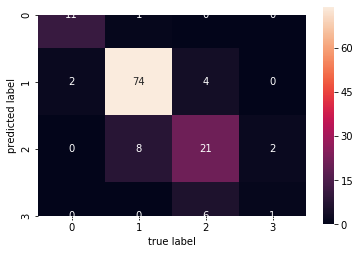

In [31]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

Now we are going to classify the model in Random Forest Classifier and let us see the accuracy. For this random forest we are going to use 1000 trees.

In [32]:
rfc=RandomForestClassifier(n_estimators=1000,random_state=0,max_depth=None)
rfc.fit(X_train_norm,y_train)
y_pred=rfc.predict(X_test_norm)

In [33]:
accuracy_score(y_test,y_pred)

0.8461538461538461

We are getting almost 85% accurate. Let's Visualize it in proper manner

In [34]:
y_test=le.inverse_transform(y_test)
y_pred=le.inverse_transform(y_pred)

Text(33.0, 0.5, 'predicted label')

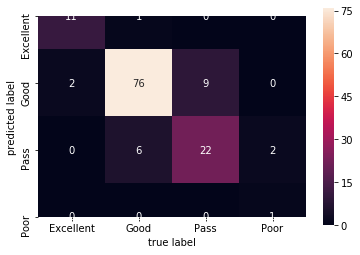

In [35]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',
           xticklabels=np.unique(y_test),
           yticklabels=np.unique(y_pred))
plt.xlabel('true label')
plt.ylabel('predicted label')

We could see that with 85% accuracy our model did it's atmost good performance. It made mistakes in predicting between Good marks and Pass marks but it neither predicted any fail as excellent nor excellent as fail. In such way our model done a good level of prediction.Hurray we got the best model of prediction. Also we will try with some of the famous classifiers like Support Vector and Gaussian Naive Bayes. Let us see how they perform with this data.

In [36]:
y_test=le.fit_transform(y_test)
y_pred=le.fit_transform(y_pred)

In [37]:
svc=SVC()
svc.fit(X_train_norm,y_train)
y_pred=svc.predict(X_test_norm)

In [38]:
accuracy_score(y_test,y_pred)

0.6384615384615384

It seems that Support Vector gets very low accuracy inspite of normalization of data. So it is unnecessary for us to go ahead with using parameters of Naive Bayes as it resukts in lower accuracy

In [39]:
gnb=GaussianNB()
gnb.fit(X_train_norm,y_train)
y_pred=gnb.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.23846153846153847

Oh my!!! Naive Bayes gives even more worser accuracy. So lets just stick with Random Forest as it gives us better study of the data.

Now let's get some basic visualisation of our data set to get more insights of our data.
Note: This is not any type of prediction. This is just visualizing our given dataset to get some intresting and useful facts out of it.

In [41]:
y_test=le.inverse_transform(y_test)
y_pred=le.inverse_transform(y_pred)

In [42]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,Good
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,Good
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,Good
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,Good


In [43]:
boys=data[data['sex']=='M']
girls=data[data['sex']=='F']
boys.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,Good
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,Good
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,Excellent
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,Good
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,0,12,13,Good


Text(0.5, 1.0, 'Girls Performance in Grade 3')

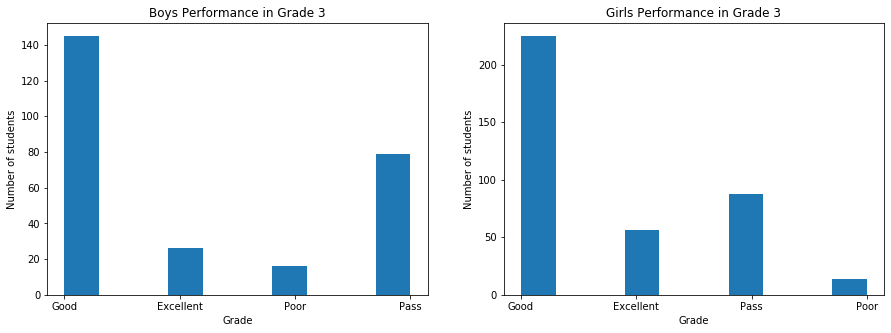

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].hist(boys.G3)
ax[0].set_xlabel('Grade')
ax[0].set_ylabel('Number of students')
ax[0].set_title('Boys Performance in Grade 3')
ax[1].hist(girls.G3)
ax[1].set_xlabel('Grade')
ax[1].set_ylabel('Number of students')
ax[1].set_title('Girls Performance in Grade 3')

(0, 5)

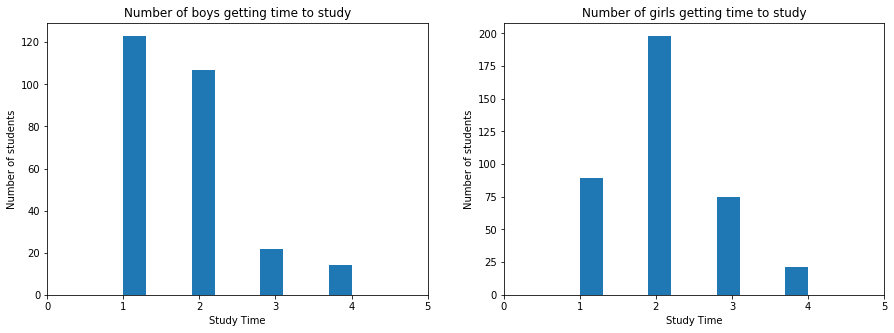

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].hist(boys.studytime)
ax[0].set_xlabel('Study Time')
ax[0].set_ylabel('Number of students')
ax[0].set_title('Number of boys getting time to study')
ax[0].set_xlim(0,5)
ax[1].hist(girls.studytime)
ax[1].set_xlabel('Study Time')
ax[1].set_ylabel('Number of students')
ax[1].set_title('Number of girls getting time to study')
ax[1].set_xlim(0,5)

Text(0.5, 1.0, 'Number of fathers who are working')

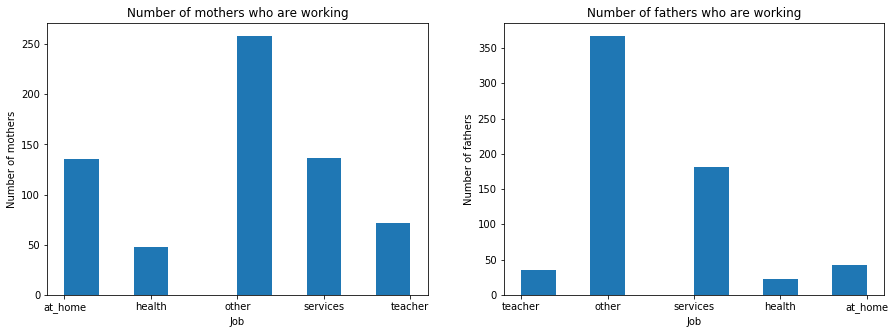

In [46]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].hist(data['Mjob'])
ax[0].set_xlabel('Job')
ax[0].set_ylabel('Number of mothers')
ax[0].set_title('Number of mothers who are working')
ax[1].hist(data['Fjob'])
ax[1].set_xlabel('Job')
ax[1].set_ylabel('Number of fathers')
ax[1].set_title('Number of fathers who are working')

Text(0.5, 1.0, 'Number of students doing extra activities other than study')

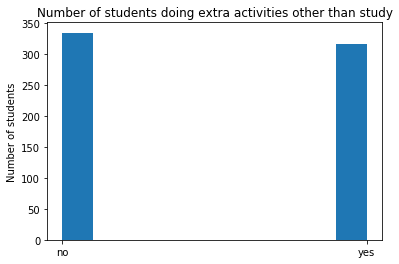

In [47]:
ax=plt.axes()
ax.hist(data['activities'])
ax.set_ylabel('Number of students')
ax.set_title('Number of students doing extra activities other than study')

Text(0.5, 1.0, 'Number of fathers who are having Educational Qualification')

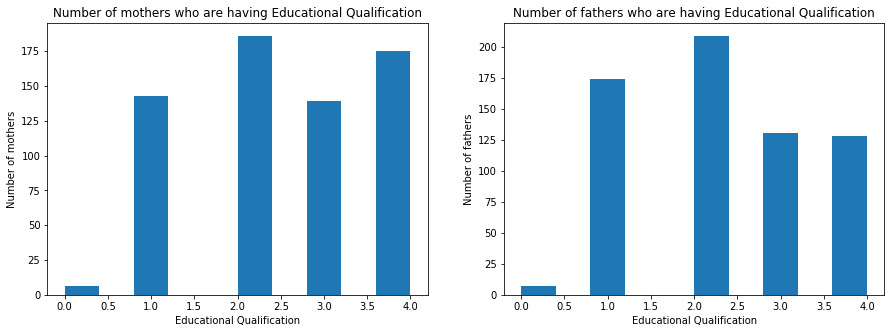

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].hist(data['Medu'])
ax[0].set_xlabel('Educational Qualification')
ax[0].set_ylabel('Number of mothers')
ax[0].set_title('Number of mothers who are having Educational Qualification')
ax[1].hist(data['Fedu'])
ax[1].set_xlabel('Educational Qualification')
ax[1].set_ylabel('Number of fathers')
ax[1].set_title('Number of fathers who are having Educational Qualification')

These visualisation gives us some insights of data. Atlast we did some good prediction.